# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the notebook will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I necourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

C:\Users\acumu\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
pd

<module 'pandas' from 'C:\\Users\\acumu\\anaconda3\\envs\\learn-env\\lib\\site-packages\\pandas\\__init__.py'>

In [6]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [7]:
pd.set_option('display.max_columns', 360)


In [8]:
# your code here
df[df['_STATE'].isin([9,34,36])]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Now check to see how large our subset df.

In [9]:
# your code here
df[df['_STATE'].isin([9,34,36])].shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [10]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [11]:
#your code here

df['PHYSHLTH'] = np.where(df['PHYSHLTH'] == 88, 0, df['PHYSHLTH'])
df['PHYSHLTH']

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
         ... 
303774    0.0
303775    0.0
303776    6.0
303777    0.0
303778    0.0
Name: PHYSHLTH, Length: 34545, dtype: float64

In [12]:
df['PHYSHLTH'].describe()

count    34545.000000
mean         5.963931
std         14.922805
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

In [13]:
df['PHYSHLTH'] = np.where(((df['PHYSHLTH'] == 77) | (df['PHYSHLTH'] == 99)), np.nan, df['PHYSHLTH'])
df['PHYSHLTH']

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
         ... 
303774    0.0
303775    0.0
303776    6.0
303777    0.0
303778    0.0
Name: PHYSHLTH, Length: 34545, dtype: float64

In [14]:
df['PHYSHLTH']

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
         ... 
303774    0.0
303775    0.0
303776    6.0
303777    0.0
303778    0.0
Name: PHYSHLTH, Length: 34545, dtype: float64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [15]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [16]:
# descriptive statistics


Text(0, 0.5, 'Days Sick')

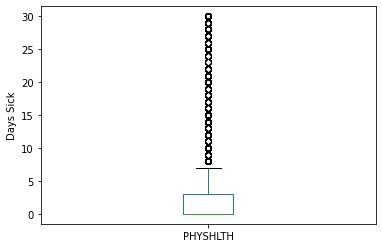

In [17]:
ax = df['PHYSHLTH'].plot.box()
plt.ylabel('Days Sick')

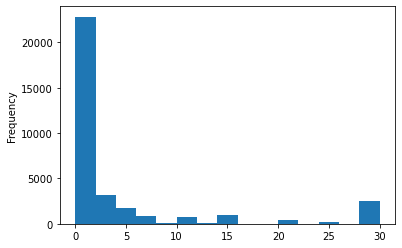

In [18]:
ax = df['PHYSHLTH'].plot.hist(bins=15) # this allows us to see how many people were sick

In [19]:
# graph the distribution of data


## 3. Generate a graphic that compares the average number of sick days for each state. 

In [20]:
df.groupby(['_STATE']).mean()['PHYSHLTH']

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [21]:
# code to calculate the average number of sick days by state



Text(0.5, 1.0, 'Comparing Health by State')

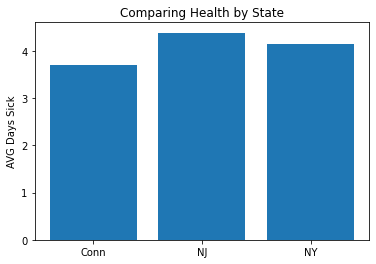

In [22]:
states = ['Conn', 'NJ', 'NY']

plt.bar(states, df.groupby(['_STATE']).mean()['PHYSHLTH'])
plt.ylabel('AVG Days Sick')
plt.title('Comparing Health by State')

In [23]:
# Use ANOVA test to determine if the differences are statistically significant

In [24]:
# code to graph those averages using matplotlib


In [25]:
df.groupby(['_STATE']).sum()['PHYSHLTH']

_STATE
9.0     38409.0
34.0    50197.0
36.0    49262.0
Name: PHYSHLTH, dtype: float64

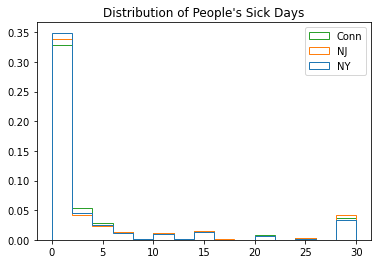

In [26]:
x1 = df[df['_STATE'] == 9]['PHYSHLTH'] 
x2 = df[df['_STATE'] == 34]['PHYSHLTH']
x3 = df[df['_STATE'] == 36]['PHYSHLTH']

plt.hist([x1, x2, x3], bins = 15, histtype = 'step', stacked = False, fill = False, density = True)

plt.title("Distribution of People's Sick Days")

plt.legend(['Conn', 'NJ', 'NY'])

In [27]:
# Density = True gives us the percentage on the y axis instead of counts
# We do this because it's easier to compare percentages over counts

In [28]:
# graphic showing the histogram of data



## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [29]:
# code to createa new colum for chronically sick. We decide how many days count as chronically sick.
df['chron'] = np.where(df['PHYSHLTH']>13, 1, 0)
df['chron']

49938     0
49939     0
49940     0
49941     0
49942     0
         ..
303774    0
303775    0
303776    0
303777    0
303778    0
Name: chron, Length: 34545, dtype: int32

In [30]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chron
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [31]:
# code to create new colum for chronically sick

df['chron'] = np.where(df['PHYSHLTH']>13, 1, 0)
df['chron']

49938     0
49939     0
49940     0
49941     0
49942     0
         ..
303774    0
303775    0
303776    0
303777    0
303778    0
Name: chron, Length: 34545, dtype: int32

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [32]:
df.groupby(['_STATE']).mean()['chron']

_STATE
9.0     0.110691
34.0    0.133840
36.0    0.122459
Name: chron, dtype: float64

In [33]:
# code to calculate averages per state


Text(0.5, 1.0, 'Comparing Health by State')

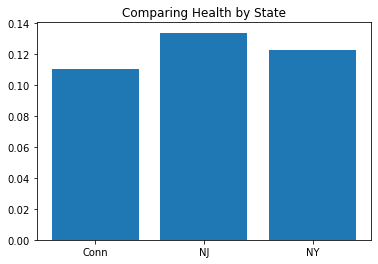

In [34]:
states = ['Conn', 'NJ', 'NY']

plt.bar(states, df.groupby(['_STATE']).mean()['chron'])

plt.title('Comparing Health by State')

In [35]:
# create graphic to compare chronically sick by state


## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [36]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chron
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [37]:
# your code here

In [38]:
df['SMOKDAY2'] = np.where(df['SMOKE100'] == 2, 3, df['SMOKDAY2'])
df['SMOKDAY2']

49938     3.0
49939     3.0
49940     3.0
49941     3.0
49942     3.0
         ... 
303774    1.0
303775    3.0
303776    3.0
303777    NaN
303778    3.0
Name: SMOKDAY2, Length: 34545, dtype: float64

In [39]:
df['SMOKDAY2'] = np.where(df['SMOKE100'] == 7, 7, df['SMOKDAY2'])
df['SMOKDAY2']

49938     3.0
49939     3.0
49940     3.0
49941     3.0
49942     3.0
         ... 
303774    1.0
303775    3.0
303776    3.0
303777    NaN
303778    3.0
Name: SMOKDAY2, Length: 34545, dtype: float64

In [40]:
df['SMOKDAY2'] = np.where(df['SMOKE100'] == 9, 9, df['SMOKDAY2'])
df['SMOKDAY2']

49938     3.0
49939     3.0
49940     3.0
49941     3.0
49942     3.0
         ... 
303774    1.0
303775    3.0
303776    3.0
303777    9.0
303778    3.0
Name: SMOKDAY2, Length: 34545, dtype: float64

In [41]:
df.groupby(['SMOKDAY2']).count()['_STATE']

SMOKDAY2
1.0     2676
2.0     1371
3.0    28790
7.0      180
9.0       78
Name: _STATE, dtype: int64

Text(0, 0.5, 'Percent of survey')

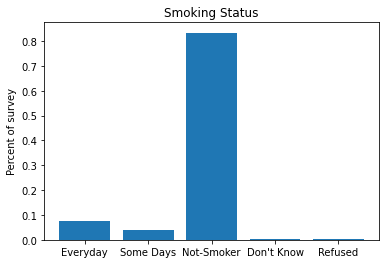

In [42]:
#smokestatus = ["Non-Smoker", "Everyday", "Some Days", "Don't Know", "Refused"]
smokestatus = ["Everyday", "Some Days", "Not-Smoker", "Don't Know", "Refused"]

plt.bar(smokestatus, df.groupby(['SMOKDAY2']).count()['_STATE'] / 34545)

plt.title('Smoking Status')
plt.ylabel('Percent of survey')

In [43]:
# Instead of dividing by 34545, you can use .value_counts(normalize = True)
# Don't know if this works for pandas

In [44]:
# code to graph those proportion of differen smoking groups using matplotlib


In [45]:
# your code here
states = ['Conn', 'NJ', 'NY']

smokevry = df[df['SMOKDAY2']==1].groupby('_STATE').count()
smoknon = df[df['SMOKDAY2']==3].groupby('_STATE').count()
smoksm = df[df['SMOKDAY2']==2].groupby('_STATE').count()
smokunk = df[df['SMOKDAY2']==7].groupby('_STATE').count()

In [46]:
smok_status_st = df.groupby(['_STATE', 'SMOKDAY2'])['IDAY'].count().unstack('_STATE')

In [47]:
smok_status_st

_STATE,9.0,34.0,36.0
SMOKDAY2,,,
1.0,713,927,1036
2.0,351,484,536
3.0,9008,9799,9983
7.0,70,79,31
9.0,29,15,34


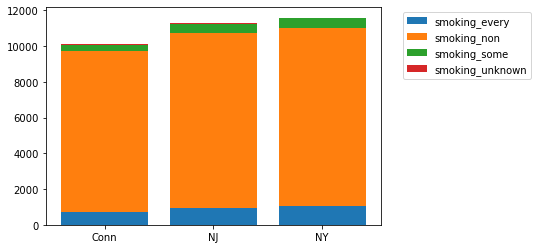

In [48]:
fig, ax = plt.subplots()

ax.bar(states, smok_status_st.iloc[0], label = 'smoking_every')
ax.bar(states, smok_status_st.iloc[2], bottom = smok_status_st.iloc[0], label = 'smoking_non')
ax.bar(states, smok_status_st.iloc[1], bottom = smok_status_st.iloc[0] +  smok_status_st.iloc[2], label = 'smoking_some')
ax.bar(states, smok_status_st.iloc[3], bottom = smok_status_st.iloc[0] + smok_status_st.iloc[2] + smok_status_st.iloc[1], label = 'smoking_unknown')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

In [49]:
df[df['SMOKDAY2']==1].groupby('_STATE').count()

,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chron
_STATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9.0,713,713,713,713,713,713,713,713,290,290,1,290,290,1,289,289,289,423,423,423,423,423,1,423,423,423,713,706,713,447,713,713,713,713,713,241,713,681,255,713,713,713,713,130,713,713,713,713,713,713,713,93,253,253,253,253,713,713,713,713,290,10,290,713,713,713,713,713,713,713,125,713,713,713,713,713,713,713,713,712,0,711,702,397,698,399,399,397,686,681,679,675,673,671,667,399,396,395,393,204,204,656,656,652,226,651,409,644,283,641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [50]:
#graph showing the breakdown of smokers per state

In [51]:
df.groupby(['SMOKDAY2']).mean()['PHYSHLTH'][0:8]

SMOKDAY2
1.0    6.653007
2.0    6.295659
3.0    3.764435
7.0    3.868263
Name: PHYSHLTH, dtype: float64

Text(0, 0.5, 'Days Sick')

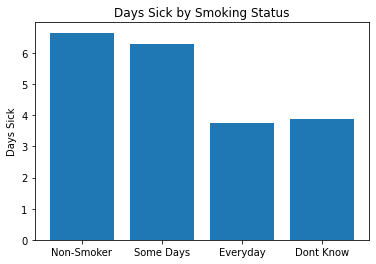

In [52]:
fig, ax = plt.subplots()

plt.bar(['Non-Smoker', 'Some Days', 'Everyday', 'Dont Know'], df.groupby(['SMOKDAY2']).mean()['PHYSHLTH'][0:8],)

plt.title('Days Sick by Smoking Status')
plt.ylabel('Days Sick')

In [53]:
# code to graph these averages sick days for each category of smoking status

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [54]:
df['ALCDAY5']

49938     101.0
49939     230.0
49940     888.0
49941     103.0
49942     101.0
          ...  
303774    203.0
303775    888.0
303776    204.0
303777    999.0
303778    230.0
Name: ALCDAY5, Length: 34545, dtype: float64

In [55]:
df['ALCDAY5'].describe()

count    32638.000000
mean       471.827042
std        350.789273
min        101.000000
25%        201.000000
50%        215.000000
75%        888.000000
max        999.000000
Name: ALCDAY5, dtype: float64

In [56]:
# code here to clean up the ALCDAY5 responses
df['ALCDAY5'] = np.where((df['ALCDAY5'] >= 101) & (df['ALCDAY5'] <= 107) , ((df['ALCDAY5'] - 100)*4), df['ALCDAY5'])
df['ALCDAY5'] = np.where((df['ALCDAY5'] >= 201) & (df['ALCDAY5'] <= 230) , df['ALCDAY5'] - 200, df['ALCDAY5'])
df['ALCDAY5'] = np.where(df['ALCDAY5'] == 888 , 0, df['ALCDAY5'])
df['ALCDAY5'] = np.where(df['ALCDAY5'] == 777 , np.nan, df['ALCDAY5'])
df['ALCDAY5'] = np.where(df['ALCDAY5'] == 999 , np.nan, df['ALCDAY5'])
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chron
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,3.0,2.0,NaN,4.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [57]:
df['ALCDAY5'].describe()

count    32212.000000
mean         5.295697
std          8.175906
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: ALCDAY5, dtype: float64

In [58]:
#descriptive statistics of cleaned data

C:\Users\acumu\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\acumu\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.3043e+04, 3.0270e+03, 2.3240e+03, 1.3500e+03, 2.7400e+03,
        1.1560e+03, 3.8900e+02, 2.7800e+02, 1.6010e+03, 2.8000e+01,
        8.4000e+02, 1.0000e+01, 9.2600e+02, 1.1000e+01, 5.3000e+01,
        5.9000e+02, 4.0100e+02, 7.0000e+00, 1.9000e+01, 1.0000e+00,
        1.0020e+03, 1.3000e+01, 1.3000e+01, 2.0000e+00, 1.2300e+02,
        2.6500e+02, 1.5000e+01, 2.4000e+01, 7.6600e+02, 1.1950e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <BarContainer object of 30 artists>)

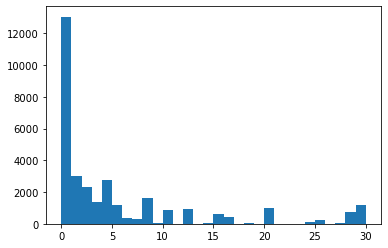

In [59]:
#counts, bins = np.histogram(df['ALCDAY5'])
plt.hist(df['ALCDAY5'], bins = 30)

In [60]:
# graphic showing the histogram of data


In [61]:
df.groupby('_STATE')['ALCDAY5'].mean()

_STATE
9.0     6.004043
34.0    4.887713
36.0    5.073933
Name: ALCDAY5, dtype: float64

In [62]:
# code to calculate averages per state


In [63]:
df[['ALCDAY5', 'PHYSHLTH']].corrwith(df['PHYSHLTH'])
#df[['ALCDAY5', 'PHYSHLTH']].corr()

ALCDAY5    -0.090443
PHYSHLTH    1.000000
dtype: float64

In [64]:
# Code to calculate correlation of between number of dirnks of number of days physically ill

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [65]:
#Use t interval (mean)

In [66]:
import scipy.stats as st

In [67]:
dfree = df['PHYSHLTH'].count()-1

In [68]:
sterr = st.sem(df['PHYSHLTH'], nan_policy='omit')

In [69]:
st.t.interval(0.95, df=dfree, loc=df['PHYSHLTH'].mean(), scale=sterr)

(3.9945079218863824, 4.176173916499252)

We are 94% confident that the population mean for physically ill days falls between 3.99 and 4.176 days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [70]:
# Use z interval (proportion)

In [71]:
import statsmodels.api as sm

In [72]:
dfree2 = df['chron'].count()-1

In [73]:
sm.stats.proportion_confint(dfree2 * df['chron'].mean(), dfree2)

(0.11924953721630117, 0.12616948145499712)

We're 95% confident that our proportion of chronically ill individuals is between 11.9% and 12.6%

___

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

## 9. Hypothesis Tests 

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. Based on the sample, assess whether or not the population mean is 4.
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there is a statistically significant difference is physical health of people from the three states. 


H0: The population mean is 4
HA: The population mean is not 4

1. Based on our previous confidence interval of 3.99, 4.18, we fail to reject the H0.

Could also do a one sample t test

**2. Null hypothesis: The population mean for men is equal to the population mean for women**

In [74]:
df['SEX'].head()

49938    2.0
49939    1.0
49940    2.0
49941    2.0
49942    2.0
Name: SEX, dtype: float64

In [75]:
df.groupby(['SEX'])['PHYSHLTH'].mean()

SEX
1.0    3.700972
2.0    4.385278
9.0    5.388889
Name: PHYSHLTH, dtype: float64

In [76]:
men = df[df['SEX'] == 1]['PHYSHLTH']
women = df[df['SEX'] == 2]['PHYSHLTH']

In [77]:
st.ttest_ind(men, women, nan_policy = 'omit')

Ttest_indResult(statistic=-7.3333586565586, pvalue=2.2949494326055257e-13)

2. p value < alpha, reject H0, so there is a statistically significant difference between men and women in the number of days a person feels phsyically ill

In [78]:
men_mean_sickdays = men.mean()
women_mean_sickdays = women.mean()

men_mean_sickdays

3.700971791064921

In [79]:
st.t.interval(0.95, df=dfree, loc=df['PHYSHLTH'].mean(), scale=sterr)

(3.9945079218863824, 4.176173916499252)

**3. Null hypothesis: the population mean for the 3 states is equal**

In [80]:
conn = df[df['_STATE'] == 9]
NJ = df[df['_STATE'] == 34]
NY = df[df['_STATE'] == 36]


In [81]:
conn_health = conn['PHYSHLTH'].dropna()
NJ_health = NJ['PHYSHLTH'].dropna()
NY_health = NY['PHYSHLTH'].dropna()

In [82]:
conn_health

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
         ... 
60521     0.0
60522     0.0
60523    30.0
60524     0.0
60525    14.0
Name: PHYSHLTH, Length: 10413, dtype: float64

In [83]:
NJ_health

273284    0.0
273285    4.0
273286    0.0
273287    0.0
273288    0.0
         ... 
284987    4.0
284988    0.0
284989    0.0
284990    0.0
284991    0.0
Name: PHYSHLTH, Length: 11458, dtype: float64

In [84]:
NY_health

291530     3.0
291531    24.0
291532     0.0
291533     7.0
291534     0.0
          ... 
303774     0.0
303775     0.0
303776     6.0
303777     0.0
303778     0.0
Name: PHYSHLTH, Length: 11876, dtype: float64

In [85]:
st.f_oneway(conn_health, NJ_health, NY_health)


F_onewayResult(statistic=18.558644605907094, pvalue=8.800607044147037e-09)

3. p < alpha, reject null hypothesis,  there is a statistically significant difference in physical health of people from the three states.

### 9.B The following questions are regarding the  `CHRONIC` variable.
1. Based on the sample, asses if true population proportion of chronically sick people is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in proportion of people with chronic health issues from the three states.

**1. Based on the sample, asses if true population proportion of chronically sick people is 0.10?
Null Hypothesis: The true population proportion of chronically sick people is equal to 0.10
Alternative Hypothesis: The true population proportion of chronically sick people is not equal to 0.10**

In [86]:
from statsmodels.stats.proportion import proportions_ztest

In [87]:
import statsmodels.stats.proportion as smp

In [88]:
chron_count = df['chron'].count()
chron_count

34545

In [89]:
chron_sum = df['chron'].sum()
chron_sum

4239

In [90]:
chron_prop = df['chron'].sum()/df['chron'].count()
chron_prop

0.12270950933564916

In [91]:
proportions_ztest(chron_sum, chron_count, value=0.10)

(12.864399802269201, 7.139433031344905e-38)

1. We reject the null hypothesis because the p value is less than alpha = 0.05

**2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?**

In [92]:
df['SEX'].head()

49938    2.0
49939    1.0
49940    2.0
49941    2.0
49942    2.0
Name: SEX, dtype: float64

In [93]:
men_chron = df[df['SEX'] == 1]['chron']
women_chron = df[df['SEX'] == 2]['chron']

In [94]:
men_chron_sum = men_chron.sum()
men_chron_sum

1669

women_chron_sum = women_chron.sum()
women_chron_sum

In [96]:
men_chron_count = men_chron.count()
men_chron_count

15158

In [97]:
women_chron_count = women_chron.count()
women_chron_count

19366

In [98]:
#t test
#st.ttest_ind(men_chron, women_chron, nan_policy = 'omit')

In [99]:
#2 proportion z test
proportions_ztest([men_chron_sum, women_chron_sum], [men_chron_count, women_chron_count], value = 0)

(-6.308239995140626, 2.8222635367054897e-10)

2. p > alpha. According to the z test, there is a statistically significant difference in the percentage of men and women who are chronically sick

**3. Perform a statistical test to determine if there is a statistically significant difference in proportion of people with chronic health issues from the three states.**

In [100]:
import scipy.stats as stats

In [101]:
df.groupby(['_STATE'])['chron'].count()

_STATE
9.0     10588
34.0    11708
36.0    12249
Name: chron, dtype: int64

In [102]:
df.groupby(['_STATE'])['chron']

In [103]:
df_state_chron = df.groupby(['_STATE', 'chron'])['IDAY'].count()
df_state_chron

_STATE  chron
9.0     0         9416
        1         1172
34.0    0        10141
        1         1567
36.0    0        10749
        1         1500
Name: IDAY, dtype: int64

In [211]:
df_state_chron = df.groupby(['_STATE', 'chron'])['IDAY'].count().unstack('_STATE')
df_state_chron

_STATE,9.0,34.0,36.0
chron,,,
0,9416,10141,10749
1,1172,1567,1500


In [212]:
totals = np.array(df_state_chron)
totals

array([[ 9416, 10141, 10749],
       [ 1172,  1567,  1500]], dtype=int64)

In [213]:
result = stats.contingency.chi2_contingency(totals)
chi, p, dof, exp = result
result

(27.68707914688268,
 9.723601528982133e-07,
 2,
 array([[ 9288.75171515, 10271.3170647 , 10745.93122015],
        [ 1299.24828485,  1436.6829353 ,  1503.06877985]]))

3. p < alpha, so  there is a statistically significant difference in proportion of people with chronic health issues from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

**1. Determine sample mean and sample standard deviation of mental health days MENTHLTH**

In [186]:
#set 88(none) to 0 and drop 77(don't know) and 99(refused)
df['MENTHLTH'] = np.where((df['MENTHLTH'] == 88), (df['MENTHLTH'] == 0), (df['MENTHLTH']))
df_menthlth = df[df['MENTHLTH']<=30]

In [168]:
df_menthlth['MENTHLTH'].describe()

count    33892.000000
mean         3.464003
std          7.755965
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: MENTHLTH, dtype: float64

In [170]:
#calculate sample mean
menthlth_mean = df_menthlth['MENTHLTH'].mean()
menthlth_mean

3.4640033046146583

In [172]:
#calculate standard deviation
menthlth_std = df_menthlth['MENTHLTH'].std()
menthlth_std

7.755965406143826

**2. Create a confidence interval for population mean of mental health days MENTHLTH**

In [169]:
#calculate degrees of freedom
dfree_menthlth = df_menthlth['MENTHLTH'].count()-1

In [176]:
#calculate confidence interval
st.t.interval(alpha=0.05, df = dfree_menthlth, loc = menthlth_mean, scale = menthlth_std) 

(2.9776481024196464, 3.9503585068096703)

We are 95% confident that the number of mental health days falls between 2.98 and 3.95 days

**3. Perform a 2 sample test of means for gender regarding mental health days MENTHLTH**

In [177]:
#divide mental health days by gender
men_menthlth = df[df['SEX'] == 1]['MENTHLTH']
women_menthlth = df[df['SEX'] == 2]['MENTHLTH']

In [178]:
stats.ttest_ind(men_menthlth, women_menthlth, equal_var=True)

Ttest_indResult(statistic=-7.214207156645987, pvalue=5.536399312005622e-13)

The pvalue is less than .05 so there is a significant difference in the number of mental health days taken by men and women.

**4. Perform a one-way ANOVA on mental health days by state**

In [182]:
#assign variables for mental health days by state
conn_menthlth = conn['MENTHLTH'].dropna()
NJ_menthlth = NJ['MENTHLTH'].dropna()
NY_menthlth = NY['MENTHLTH'].dropna()

In [183]:
#perform one-way ANOVA on mental health days by state
st.f_oneway(conn_menthlth, NJ_menthlth, NY_menthlth)

F_onewayResult(statistic=25.31535252421388, pvalue=1.0321238394753296e-11)

The pvalue is less than .05 so there is a significant different in the number of mental health days by state.

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**

  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.

**1. Create a confidence interval for a population proportion for those who have been diagnosed as having had a heart attack CVDINFR4.**


In [187]:
#finding proportion of people who have had heart attacks divided by the total population
heart_attack = df[df['CVDINFR4']==1]
no_heart_attack = df[df['CVDINFR4']==2]
heart_attack_prop = heart_attack['CVDINFR4'].count()/(no_heart_attack['CVDINFR4'].count()+heart_attack['CVDINFR4'].count())

In [188]:
#calculate confidence interval
dfree_ha = heart_attack['CVDINFR4'].count()+no_heart_attack['CVDINFR4'].count()-1
sm.stats.proportion_confint(dfree_ha *heart_attack_prop, dfree_ha)

(0.047876090192197525, 0.0524936009555916)

We are 95% confident that the true percentage of people who were diagnosed with a heart attack is between 4.8% and 5.2%.

**2. Perform a two proportions z-test using gender for those who have been diagnosed as having had a heart attack CVDINFR4.**

In [189]:
#create variables for men and women who have been diagnosed as having had a heart attack
men_heart = df[df['SEX'] == 1]['CVDINFR4']
women_heart = df[df['SEX'] == 2]['CVDINFR4']

In [194]:
#create variable for number of men who have been diagnosed as having a heart attack
men_heart_count = heart_attack[heart_attack['SEX']==1].count()['IDAY']
men_heart_count

1017

In [195]:
##create variable for number of women who have been diagnosed as having a heart attack
women_heart_count = heart_attack[heart_attack['SEX']==2].count()['IDAY']
women_heart_count

705

In [199]:
#create variable for number of total observations for men
men_heart_nobs = df[df['SEX'] == 1]['CVDINFR4'].count()
men_heart_nobs

15158

In [193]:
#create variable for numbe of total observations for women
women_heart_nobs = women_heart = df[df['SEX'] == 2]['CVDINFR4'].count()
women_heart_nobs

19366

In [154]:
#2 proportion z test
proportions_ztest([men_heart_count, women_heart_count], [men_heart_nobs, women_heart_nobs], value = 0)

(12.99934264330907, 1.2339941069766513e-38)

The p value < alpha so there is a significant difference between the amount of men and women who have been diagnosed with a heart attack.

**3. Perform a Chi-Square test for those who have been diagnosed as having had a heart attack CVDINFR4 by state.**

In [124]:
df.groupby(['_STATE'])['CVDINFR4'].count()

_STATE
9.0     10588
34.0    11708
36.0    12249
Name: CVDINFR4, dtype: int64

In [196]:
#group number of people who have been diagnosed as having had a heart attack by state
df.groupby(['_STATE'])['CVDINFR4']

In [126]:
df_state_heart = df.groupby(['_STATE', 'CVDINFR4'])['IDAY'].count()
df_state_heart

_STATE  CVDINFR4
9.0     1.0           491
        2.0         10037
        7.0            51
        9.0             9
34.0    1.0           620
        2.0         11025
        7.0            52
        9.0            11
36.0    1.0           613
        2.0         11567
        7.0            64
        9.0             5
Name: IDAY, dtype: int64

In [127]:
df_state_chron = df.groupby(['_STATE', 'CVDINFR4'])['IDAY'].count().unstack('_STATE')
df_state_chron

_STATE,9.0,34.0,36.0
CVDINFR4,,,
1.0,491,620,613
2.0,10037,11025,11567
7.0,51,52,64
9.0,9,11,5


In [197]:
#create two arrays
totals = np.array(df_state_chron)
totals

array([[  491,   620,   613],
       [10037, 11025, 11567],
       [   51,    52,    64],
       [    9,    11,     5]], dtype=int64)

In [198]:
#perform chi_square test
result = stats.contingency.chi2_contingency(totals)
chi, p, dof, exp = result
result

(8.50112379002964,
 0.2036387157925204,
 6,
 array([[5.28403879e+02, 5.84298509e+02, 6.11297612e+02],
        [1.00007484e+04, 1.10586288e+04, 1.15696228e+04],
        [5.11852945e+01, 5.65996816e+01, 5.92150239e+01],
        [7.66246924e+00, 8.47300622e+00, 8.86452453e+00]]))

The p value < alpha so there is a significant difference between the number of people who have been diagnosed with heart attacks across the three states.